
<br>
<font>
<!-- <img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" alt="SUT logo" width=300 height=300 align=left class="saturate"> -->
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=200 height=200>
<br>
<font color=0F5298 size=7>
Machine Learning <br>
<font color=2565AE size=5>
Electrical Engineering Department <br>
Spring 2024<br>
<font color=3C99D size=5>
Practical Assignment 4 <br>
<font color=696880 size=4>
<!-- <br> -->


____

# Personal Data

In [1]:
student_number = '99106403'
first_name = 'Mehdi'
last_name = 'Abbaszadeh'

# Introduction

In this assignment, we will be performing clustering on Spotify songs.

# Data Preprocessing

In the next cell, import the libraries you'll need.

In [2]:
# TODO: Write your code here
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
import random

# In the `spotify.csv` file, load the data. Exclude unrelated features and retain only the track name and the features you believe are relevant.

In [10]:
# TODO: Write your code here
spotify_df = pd.read_csv('spotify.csv')


# Retain only the relevant features
relevant_features = ['track_name', 'track_popularity', 'acousticness', 'danceability',
                     'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness'
                     , 'speechiness', 'tempo', 'valence']

spotify_df = spotify_df[relevant_features]

In this cell, you should implement a standard scalar function from scratch and applying it to your data. Explian importance behind using a standard scalar and the potential complications that could arise in clustering if it's not employed. (you can't use `sklearn.preprocessing.StandardScaler` but you are free to use `sklearn.preprocessing.LabelEncoder`)

In [11]:
# TODO: Write your code here
def standard_scale(data):
    means = data.mean(axis=0)
    stds = data.std(axis=0)
    scaled_data = (data - means) / stds
    return scaled_data

track_names = spotify_df['track_name']
features = spotify_df.drop(columns=['track_name'])
scaled_features = standard_scale(features)

Standard scaling is crucial in clustering because it ensures that each feature contributes equally to the distance calculations that clustering algorithms rely on. Features in different scales (e.g., tempo in beats per minute, loudness in decibels) can lead to biased clustering results. Without scaling, features with larger ranges will dominate the distance metrics, skewing the clusters.

# Dimensionality Reduction

One method for dimensionality reduction is Principal Component Analysis (PCA). Use its implementation from the `sklearn` library to reduce the dimensions of your data. Then, by using an appropriate cut-off for the `_explained_variance_ratio_` in the PCA algorithm, determine the number of principal components to retain.

In [12]:
# TODO: Write your code here
pca = PCA()
pca.fit(scaled_features)

# explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# number of principal components to retain
cutoff_variance = 0.95  # Retain enough components to explain 95% of the variance
num_components = np.argmax(cumulative_variance_ratio >= cutoff_variance) + 1
print(f'Number of principal components to retain: {num_components}')

# Transform data using the optimal number of components
pca = PCA(n_components=num_components)
reduced_data = pca.fit_transform(scaled_features)

# Convert reduced data to a DataFrame
reduced_df = pd.DataFrame(reduced_data, columns=[f'PC{i+1}' for i in range(num_components)])
reduced_df = pd.concat([track_names, reduced_df], axis=1)

Number of principal components to retain: 10


# Clustering

Implement K-means for clustering from scratch.

In [13]:
# TODO: Write your code here
def initialize_centroids(X, k):
    """Randomly initialize centroids from the dataset"""
    indices = np.random.choice(X.shape[0], k, replace=False)
    return X[indices]

def assign_clusters(X, centroids):
    """Assign clusters based on closest centroid"""
    distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

def update_centroids(X, labels, k):
    """Update centroids based on cluster means"""
    centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
    return centroids

def kmeans(X, k, max_iters=100, tol=1e-4):
    """K-means clustering from scratch"""
    centroids = initialize_centroids(X, k)
    for _ in range(max_iters):
        labels = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, labels, k)
        if np.all(np.abs(new_centroids - centroids) < tol):
            break
        centroids = new_centroids
    return labels, centroids

def calculate_wss(X, labels, centroids): # for next part
    """Calculate the WSS (Within-Cluster Sum of Squares)"""
    wss = 0
    for i, centroid in enumerate(centroids):
        cluster_points = X[labels == i]
        wss += ((cluster_points - centroid)**2).sum()
    return wss

Using the function you've created to execute the K-means algorithm eight times on your data, with the number of clusters ranging from 2 to 9. For each run, display the genre of each cluster using the first two principal components in a plot.

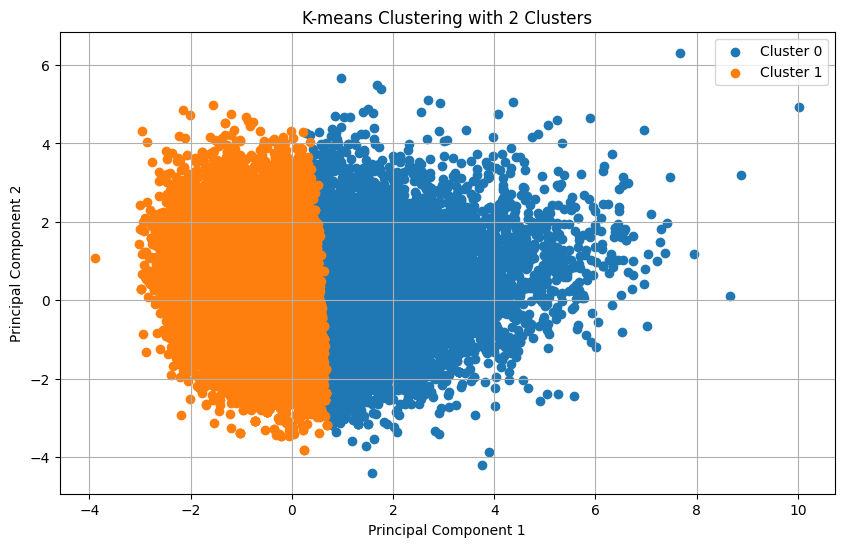

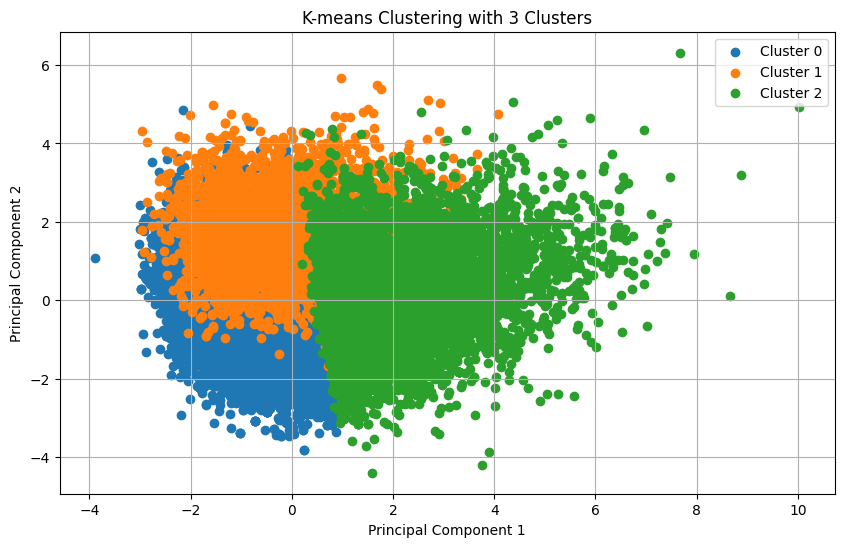

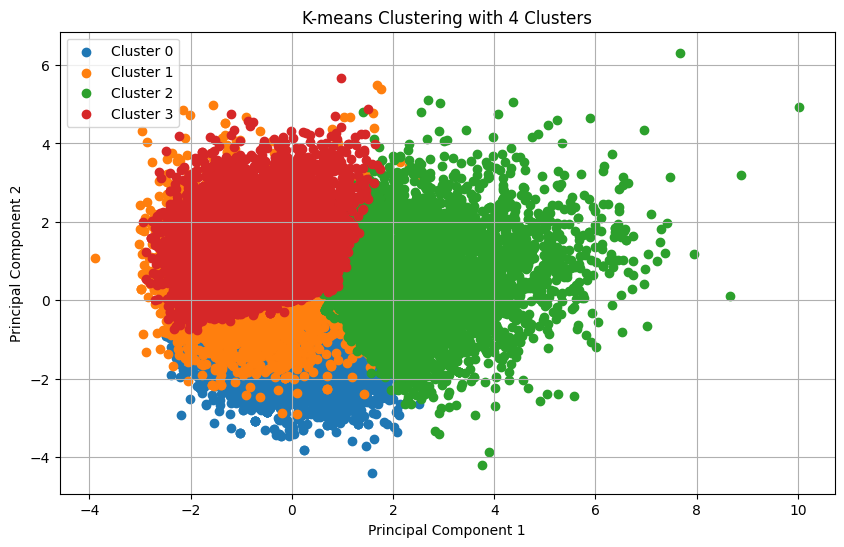

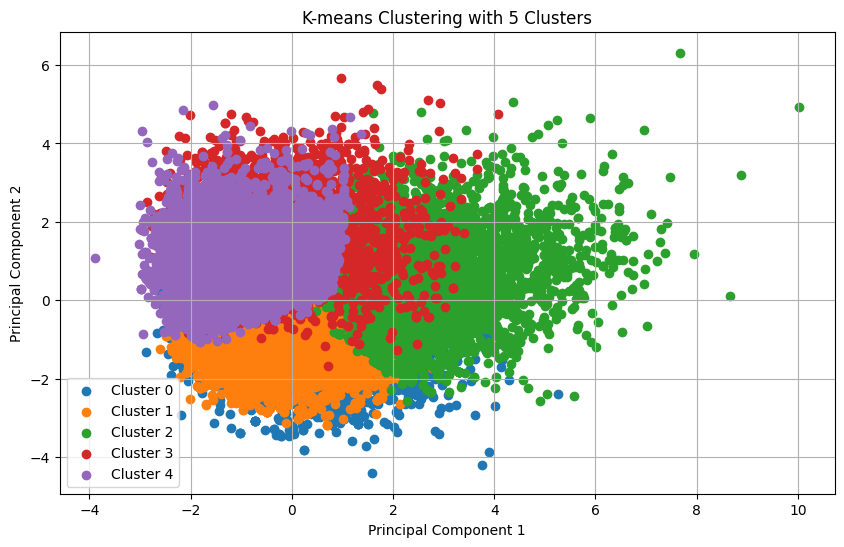

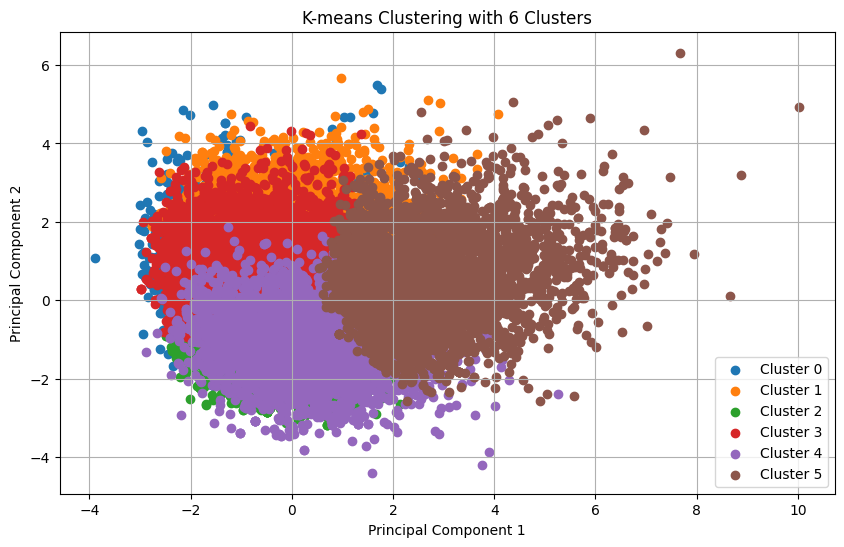

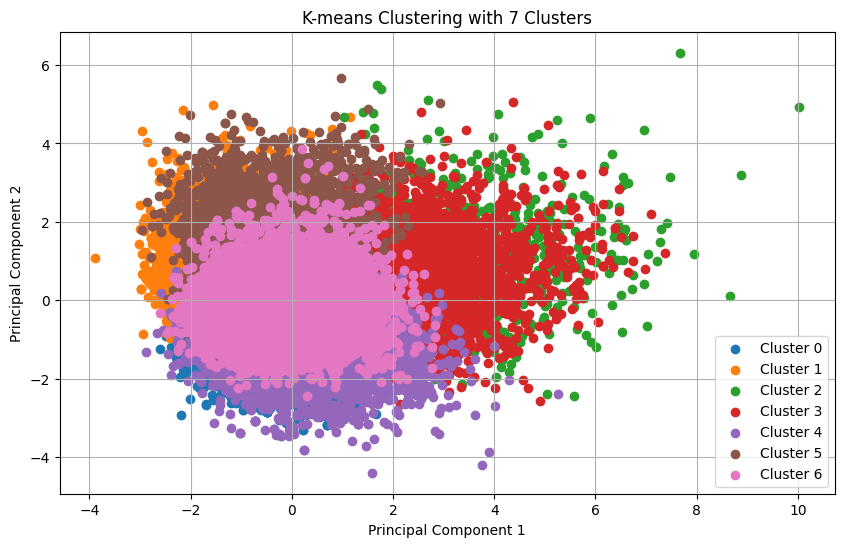

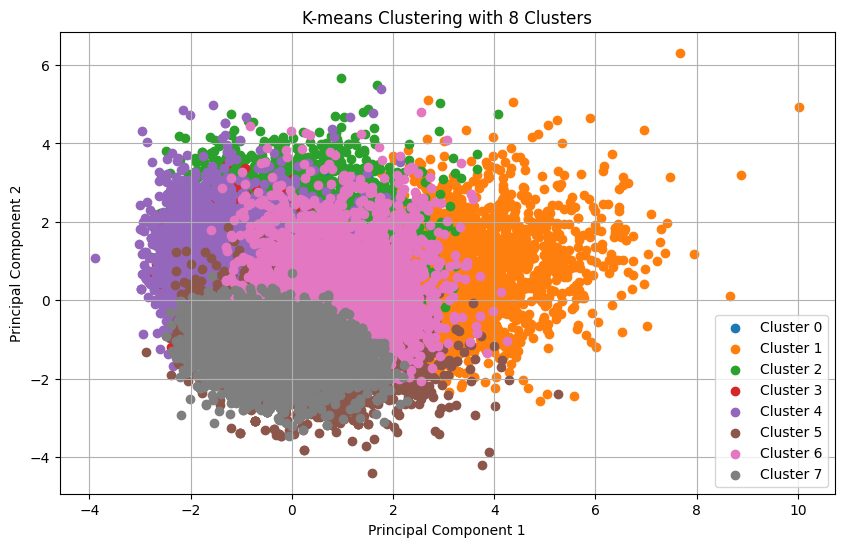

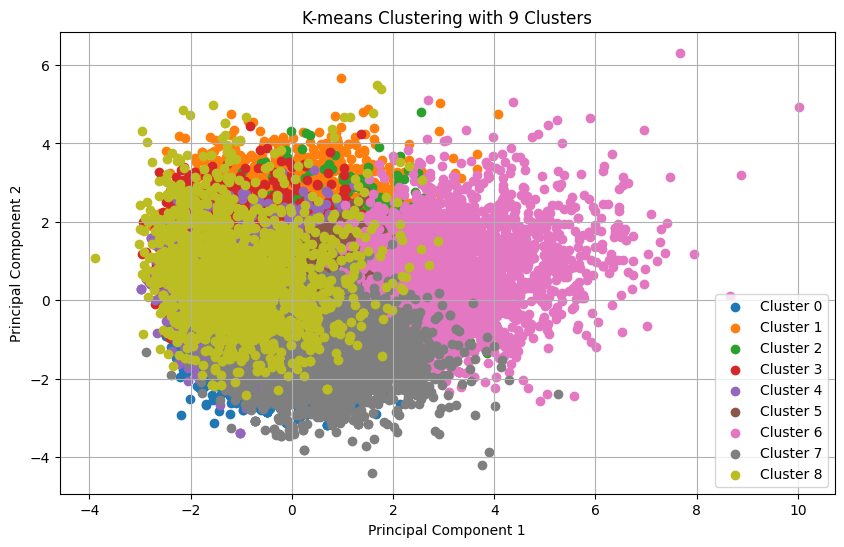

In [17]:
# TODO: Write your code here
# TODO: Write your code here
wss = [] # for next part
silhouette_scores = [] # for next part
for k in range(2, 10):
    clusters, centroids = kmeans(reduced_data, k)

    ########################## for next part
    # WSS
    wss.append(calculate_wss(reduced_data, clusters, centroids))

    # Silhouette Score
    silhouette_avg = silhouette_score(reduced_data, clusters)
    silhouette_scores.append(silhouette_avg)
    ########################## for next part

    reduced_df['Cluster' + str(k)] = clusters
    # Plot the clusters using the first two principal components
    plt.figure(figsize=(10, 6))
    for cluster in range(k):
        cluster_points = reduced_df[reduced_df['Cluster' + str(k)] == cluster]
        plt.scatter(cluster_points['PC1'], cluster_points['PC2'], label=f'Cluster {cluster}')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(f'K-means Clustering with {k} Clusters')
    plt.legend()
    plt.grid(True)
    plt.show()

The Silhouette score and the Within-Cluster Sum of Squares (WSS) score are two metrics used to assess the quality of your clustering. You can find more information about these two methods [here](https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb). Plot the Silhouette score and the WSS score for varying numbers of clusters, and use these plots to determine the optimal number of clusters (k).

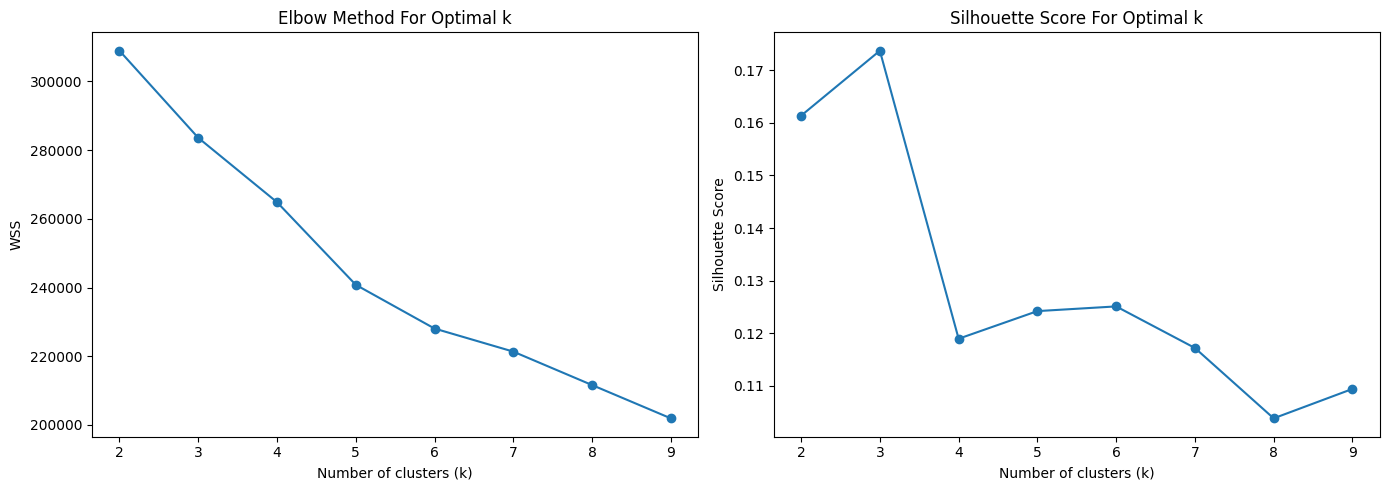

In [19]:
# calculation of these metrics were done in above cell

# Plot the WSS scores
k_values = np.arange(2, 10)
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, wss, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WSS')
plt.title('Elbow Method For Optimal k')

# Plot the Silhouette scores
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Optimal k')

plt.tight_layout()
plt.show()

In [20]:
# based on the above plots, k = 3 is the optimal number of clusters

# Checking Output

To see how good was our clustering we will use a sample check and t-SNE method.

first randomly select two song from every cluster and see how close these two songs are.

In [22]:
def sample_check(X, labels, k):
    distances = {}
    for i in range(k):
        cluster_points = reduced_data[labels == i]
        if len(cluster_points) < 2:
            continue
        samples = cluster_points[random.sample(range(len(cluster_points)), 2)]
        distance = np.linalg.norm(samples[0] - samples[1])
        distances[i] = distance
    return distances

# Using k = 3 (as it is the optimum cluster number based on the above plots)
k = 3
clusters, centroids = kmeans(reduced_data, k)

# Randomly select two songs from each cluster and calculate their distances
distances = sample_check(reduced_data, clusters, k)
for cluster, distance in distances.items():
    print(f"Cluster {cluster}: Distance between two random points = {distance}")

Cluster 0: Distance between two random points = 4.171129838139438
Cluster 1: Distance between two random points = 3.135025308501629
Cluster 2: Distance between two random points = 2.5607319409730063


Using t-SNE reduce dimension of data pointe to 2D and plot it to check how good datapoints are clustered (implementing this part is optional and have extra points)

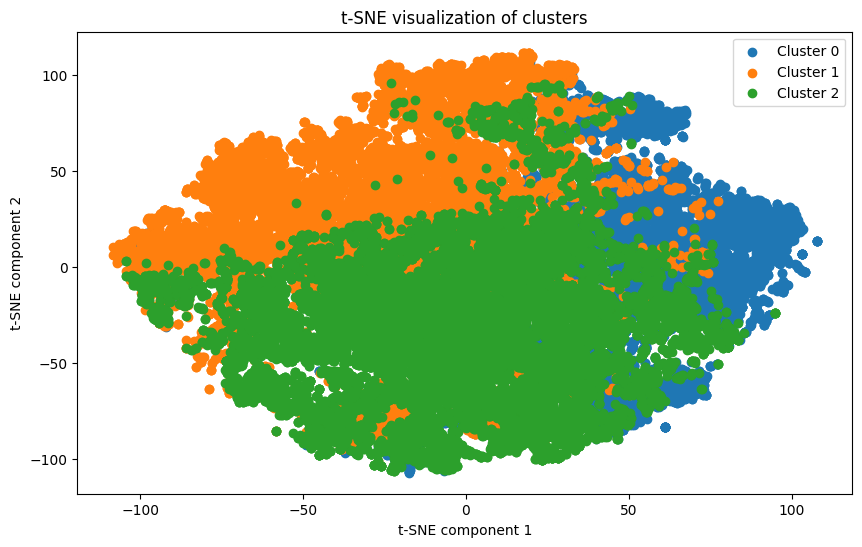

In [25]:
# TODO: Write your code here
tsne = TSNE(n_components=2, random_state=0)
data_tsne = tsne.fit_transform(reduced_data)

# Plotting the t-SNE visualization
plt.figure(figsize=(10, 6))
for i in range(k):
    cluster_points = data_tsne[clusters == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i}')
plt.legend()
plt.title('t-SNE visualization of clusters')
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.show()